<a href="https://colab.research.google.com/github/krachana-bu/Business-Analytics/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

## Question 1 (12 points)
Using the [Framingham Heart Study dataset](https://github.com/soltaniehha/Business-Analytics/blob/master/data/AnalyticsEdge-Datasets/Framingham.csv) create a **logistic regression** model to predict whether a patient will develop heart desease in 10 years or not.

Follow the steps outlined in the [Classification notebook](https://github.com/soltaniehha/Business-Analytics/blob/master/09-Machine-Learning-Overview/03-Classification.ipynb):
* Preprocessing: deleting columns with no predictive power/handling missing values
* Preprocessing: handle categorical variables, if any
* Create feature matrix and target vector. Our target variable is `TenYearCHD`
* Split the data randomly into train and test with a 70-30 split (use `random_state=833`)
* Instantiate and fit a logistic regression model
* Make predictions and find the overall accuracy, sensitivity, and specificity on your test set

**Note:** We have seen this dataset during the discussion on the Framingham Heart Study from Analytics Edge.

## Question 2 (8 points)
Open ended - Do further data exploration and create new variables when possible (feature engineering). Show your discovery process using plots and summaries. 
* How does the model performance change by adding new variables or potentially removing some of the less important ones? 
* How does the model performance change by trying different classification models?

---

### Upload your .ipynb file to Questrom Tools

A potential issue is to download the notebook before it was fully saved. To avoid this, follow these steps: 
1. go to Runtime (in the menu) and hit "Restart and run all..." 
2. after the notebook is fully run, save it and then download your .ipynb to your computer 
3. upload it back to your Drive and open it with Colab to ensure all of your recent changes are there 
4. upload the originally downloaded file to Questrom Tools.

---

The data has been loaded in the following cell:

In [14]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/AnalyticsEdge-Datasets/Framingham.csv')
df.head(3)




,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [15]:
#To determine the number of rows and columns in our dataset
df.shape

(4240, 16)

In [16]:
#importing required libraries
import numpy as np
from IPython.display import Pretty as disp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

In [17]:
#To get a gist of all the columns and see if there are any null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [18]:
#Education has some missing values - this doesn't influence heart disease and hence I'm dropping this field 
df.drop(['education'], axis=1, inplace=True) 


In [19]:
#ensuring education field is dropped successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [20]:
#Replacing the missing values of cigsPerDay,BPMeds with the minimum value. We cannot assume a mean or median and hence I'd like to give the patient the benefit of doubt.
df["cigsPerDay"].fillna(df["cigsPerDay"].min(skipna=True), inplace=True)
df["BPMeds"].fillna(df["BPMeds"].min(skipna=True), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [21]:
#For the missing values of totChol, BMI, HeartRate and Glucose I'll take the mean which is the average value. Given most patients are healthy, this might be the closest to accurate value
df["totChol"].fillna(df["totChol"].mean(skipna=True), inplace=True)
df["BMI"].fillna(df["BMI"].mean(skipna=True), inplace=True)
df["glucose"].fillna(df["glucose"].mean(skipna=True), inplace=True)
df["heartRate"].fillna(value=0,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [22]:
df.isnull().sum() #checking for any null values 

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [23]:
df.head(10)
#there are no categorical variables nor null values, we have successfully pre-processed the data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [13]:
#making a copy to be use at the end for feature exploration
test = df.copy()
test.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
df.TenYearCHD.unique() #Checking the values in our target variable. 0 is 'No' and 1 is 'Yes'

array([0, 1])

In [26]:
#Target array here is predeciting if the person will develop CHD. Assigning this value to variable y
y = df['TenYearCHD']
y.shape

(4240,)

In [27]:
#Feature set here consists of all the other variable other than TenYearCHD
X = df.drop('TenYearCHD', axis=1)
X.shape

(4240, 14)

In [29]:
#importing train_test from scikit learn 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [30]:
#importing model
from sklearn.linear_model import LogisticRegression  

#instantiating model
model = LogisticRegression(solver='liblinear')      

In [31]:
#Fitting the model
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#predicting target
y_model = model.predict(Xtest)
y_model

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("This model is {}% accurate".format(accuracy_score(ytest, y_model)*100))

This model is 85.45597484276729% accurate


85% accuracy is good, but in the field of medicine, the closer we get to 100% the better.

What is the true positive rate (or sensitivity)?

Sensitivity measures the proportion of actual positives that are correctly identified as such (In our case, the percentage of people who are correctly predicted to develop CHD in 10 years actually develop the condition). 

TPR=TPP , where  TP  is ture positives and  P  is count of all positives.

In [36]:
#count of positives
P = sum(ytest == 1)
P

193

In [37]:
#count of true positives
TP = sum((ytest == 1) & (y_model == 1))
TP

10

In [38]:
#sensitivity
TP/P

0.05181347150259067

Sensitivity is 5.2%. That is only 5.2% of the times a person who is predicted to develop CHD in 10 years actually develops the condition. There is scope for improving this value.

Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such (In our case, the percentage of people who are correctly predicted to not develop a CHD in 10 years do not develop the condition indeed). 



In [39]:
#count of negatives 
N = sum(ytest == 0)
N

1079

In [40]:
#count of true negatives
TN = sum((ytest == 0) & (y_model == 0))
TN

1077

In [41]:
TN/N

0.9981464318813716

Specificity is 99.8%. That is 99.8% percentage of people who are correctly predicted to not develop a CHD in 10 years do not develop the condition indeed. Which is a good thing.

Q2: Things I have explored:


*   Removed unnecessary features 
*   Applied different classification models to check if accuracy, sensitivity and specificity change
*   Tried to determine the co-relation between variables to see if they actually influence our answer
*   Added a new feature (feature engineering) to check if accuracy, sensitivy and specificity changes
 


**Question-2**

Part-1 Deleting unnecessary features

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [42]:
#heartRate,glucose level,sysBP and disBP change every minute and doesn't add significant value in predicting CHD 10 years down the lane. 
#Most important factors are gender, age, if the person is a smoker and the number of cigarettes they consume(to determine how much damange has been made)
#Factors like stroke, diabetes, cholostrol level add to the accuracy. If a person is diabetic, their glucose will be obviously higher and same with BP

df.drop(['heartRate'], axis=1, inplace=True) 
df.drop(['glucose'], axis=1, inplace=True)
df.drop(['sysBP'], axis=1, inplace=True)
df.drop(['diaBP'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  TenYearCHD       4240 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 364.5 KB


In [44]:
#target variable
y1 = df['TenYearCHD']
y1.shape

(4240,)

In [46]:
#feature set, now predicting based on 10 variables only
X1 = df.drop('TenYearCHD', axis=1)
X1.shape

(4240, 10)

In [47]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1, y1, test_size=0.3, random_state=833)

from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(solver='liblinear')  

In [48]:
model.fit(Xtrain1, ytrain1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_model1 = model.predict(Xtest1)
y_model1

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("This model is {}% accurate".format(accuracy_score(ytest1, y_model1)*100))

This model is 85.29874213836479% accurate


OOPS! Accuracy further decreased but not by a lot indicating those weren't required features

In [51]:
#sensitivity 
P = sum(ytest == 1)
TP = sum((ytest == 1) & (y_model == 1))
TP/P

0.05181347150259067

Sensitivity hasn't improved significantly either.

In [52]:
#specificity
N = sum(ytest == 0)
TN = sum((ytest == 0) & (y_model == 0))
TN/N

0.9981464318813716

Specificity hasn't improved significantly either.

**Coronary heart disease is often caused by the buildup of plaque, a waxy substance, inside the lining of larger coronary arteries. This buildup can partially or totally block blood flow in the large arteries of the heart.** 
Source: Wikipedia

In [53]:
#In view of above definition, 3 main features that help determine CHD are age, cigPerDay and totChol 
main_features = df[['age','cigsPerDay','totChol','TenYearCHD']]
main_features

,age,cigsPerDay,totChol,TenYearCHD
0,39,0.0,195.0,0
1,46,0.0,250.0,0
2,48,20.0,245.0,0
3,61,30.0,225.0,1
4,46,23.0,285.0,0
...,...,...,...,...
4235,48,20.0,248.0,0
4236,44,15.0,210.0,0
4237,52,0.0,269.0,0
4238,40,0.0,185.0,0


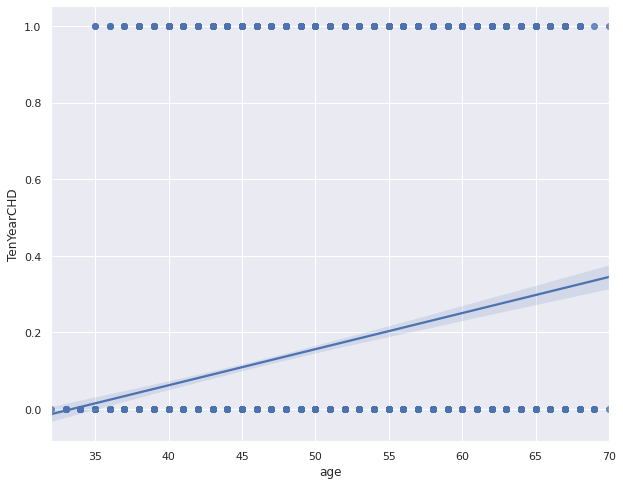

In [54]:
#to infer if there is a co-relation between age and CHD prediction
sns.regplot(x='age',y='TenYearCHD',data=main_features)
#from the graph we can see as the age increases, chances of CHD increases

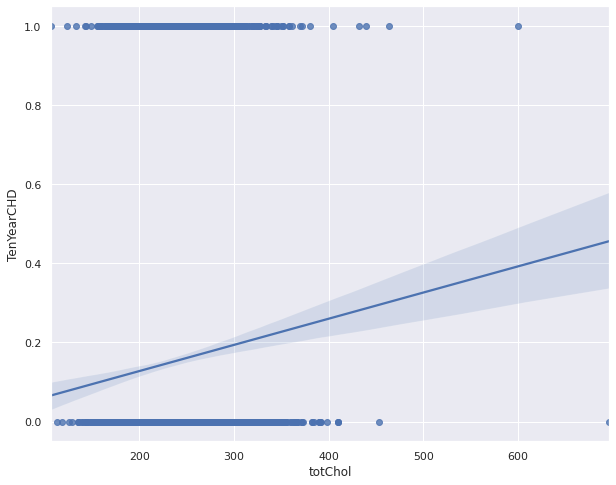

In [55]:
#to infer if there is a co-relation between total cholestrol and CHD prediction
sns.regplot(x='totChol',y='TenYearCHD',data=main_features)
#from the graph we can see as the cholestrol level increases, chances of CHD increases

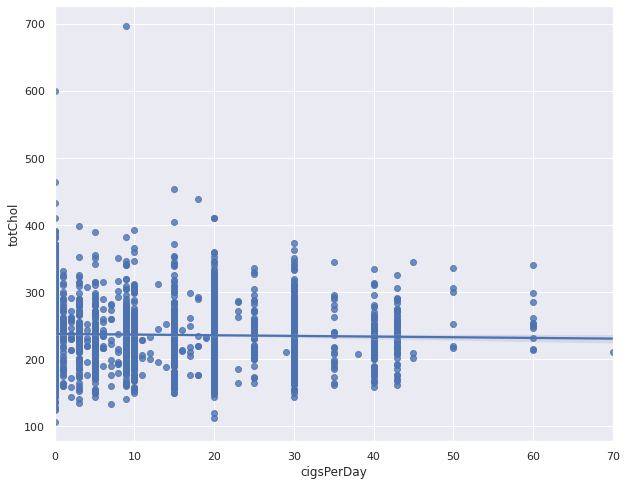

In [58]:
#to infer if there is a co-relation between cigerette's per day and total cholestrol 
sns.regplot(x='cigsPerDay',y='totChol',data=main_features)
#from the graph we cannot infer much due to a range of values
#total cholestrol level is between 150-400 with some outliers

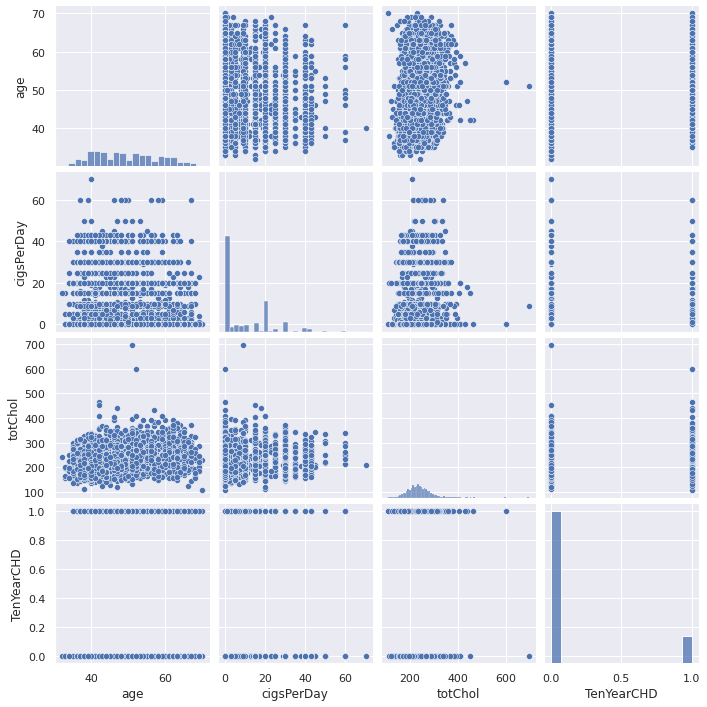

In [60]:
#pairplot to infer relationship between these 3 parameters and predicted CHD
sns.pairplot(main_features)
#I couldn't arrive at an answer from this and hence I'm going to try different classification models to see if the accuracy improves

In [61]:
#using a Gaussian model to predict CHD
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()  

In [62]:
#target variable
y = main_features['TenYearCHD']
y.shape


(4240,)

In [63]:
#feature set
X = main_features.drop('TenYearCHD', axis=1)
X.shape

(4240, 3)

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [65]:
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest) 
y_model

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
accuracy_score(ytest, y_model)

0.8498427672955975

**Unfortunately the accuracy dropped which makes me sad!**

In [67]:
P = sum(ytest == 1)
P

193

In [71]:
TP = sum((ytest == 1) & (y_model == 1))
TP

7

In [72]:
TP/P #sensitivity also dropped

0.03626943005181347

In [73]:
N = sum(ytest == 0)
N

1079

In [74]:
TN = sum((ytest == 0) & (y_model == 0))
TN

1074

In [75]:
TN/N #so did specificity

0.995366079703429

From this what I can infer is, there are maybe some features missing which help predict CHD

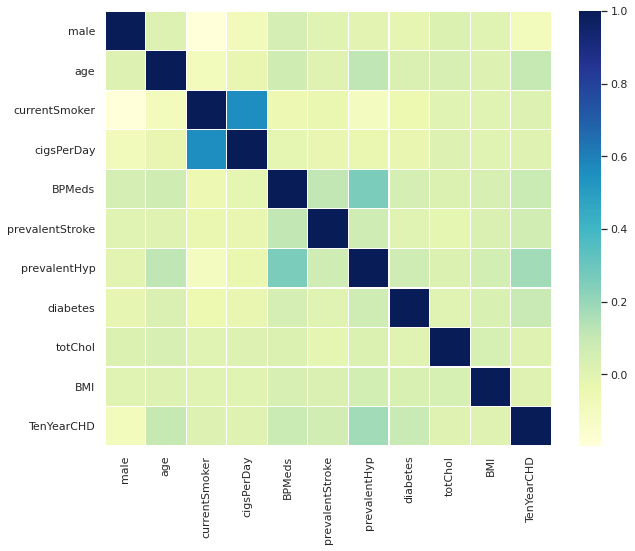

In [78]:
#checking the co-relation between all variables
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")


In [79]:
#We can see there is no strong co-relation between any of the variables. 
#Applying KNN model instead of logistic regression to check if accuracy improves on all the variables

In [80]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 

In [81]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [82]:
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest) 
y_model

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
accuracy_score(ytest, y_model)

0.8254716981132075

The accuracy further dropped. Of the 3 models, logistic regression has the highest accuracy for this data. Hence it's not the model but the data that is missing some key information


Modifying the dataset to add another feature(feature engineering) 

Having an existing heart disease could lead to increased chances of CHD
Some causes of heart disease are age and somking habits. I am creating a variable existingHC and assigning this value to be true if the person is a current smoker and above the age of 50. 


In [84]:

existingHC = pd.Series([])
for i in range(0,len(test)):
  if (test['currentSmoker'][i] == 1 and test['age'][i] > 50 ):
    existingHC[i] = 1
  else:
     existingHC[i] = 0
existingHC.head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

In [86]:
#creating an additional column in the test dataset for existingHC
test['existingHC'] = existingHC
test.head(50)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,existingHD,existingHC
0,1,39,0,0.0,0.0,0,0,0,195.000000,106.0,70.0,26.97,80.0,77.000000,0,0,0
1,0,46,0,0.0,0.0,0,0,0,250.000000,121.0,81.0,28.73,95.0,76.000000,0,0,0
2,1,48,1,20.0,0.0,0,0,0,245.000000,127.5,80.0,25.34,75.0,70.000000,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.000000,150.0,95.0,28.58,65.0,103.000000,1,1,1
4,0,46,1,23.0,0.0,0,0,0,285.000000,130.0,84.0,23.10,85.0,85.000000,0,0,0
5,0,43,0,0.0,0.0,0,1,0,228.000000,180.0,110.0,30.30,77.0,99.000000,0,0,0
6,0,63,0,0.0,0.0,0,0,0,205.000000,138.0,71.0,33.11,60.0,85.000000,1,0,0
7,0,45,1,20.0,0.0,0,0,0,313.000000,100.0,71.0,21.68,79.0,78.000000,0,0,0
8,1,52,0,0.0,0.0,0,1,0,260.000000,141.5,89.0,26.36,76.0,79.000000,0,0,0
9,1,43,1,30.0,0.0,0,1,0,225.000000,162.0,107.0,23.61,93.0,88.000000,0,0,0


#There's a sharp increase in the risk for cardiovascular disease when total cholesterol levels are 240 mg/dl and above. Goals: Total cholesterol less than 190 mg/dl. Soucrce: Wikipedia

Based on above information, patients who have totChol above 200 and have an existingHD have a high probability of getting CHD in 10 years. Hence I am assiging this value to be 1

In [87]:
for i in range(0,len(test)):
  if test['TenYearCHD'][i] == 0:
    if (test['totChol'][i] > 200 and test['existingHC'][i] == 1 ):
      test['TenYearCHD'][i] = 1

test.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,existingHD,existingHC
0,1,39,0,0.0,0.0,0,0,0,195.000000,106.0,70.0,26.97,80.0,77.000000,0,0,0
1,0,46,0,0.0,0.0,0,0,0,250.000000,121.0,81.0,28.73,95.0,76.000000,0,0,0
2,1,48,1,20.0,0.0,0,0,0,245.000000,127.5,80.0,25.34,75.0,70.000000,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.000000,150.0,95.0,28.58,65.0,103.000000,1,1,1
4,0,46,1,23.0,0.0,0,0,0,285.000000,130.0,84.0,23.10,85.0,85.000000,0,0,0
5,0,43,0,0.0,0.0,0,1,0,228.000000,180.0,110.0,30.30,77.0,99.000000,0,0,0
6,0,63,0,0.0,0.0,0,0,0,205.000000,138.0,71.0,33.11,60.0,85.000000,1,0,0
7,0,45,1,20.0,0.0,0,0,0,313.000000,100.0,71.0,21.68,79.0,78.000000,0,0,0
8,1,52,0,0.0,0.0,0,1,0,260.000000,141.5,89.0,26.36,76.0,79.000000,0,0,0
9,1,43,1,30.0,0.0,0,1,0,225.000000,162.0,107.0,23.61,93.0,88.000000,0,0,0


Fitting a model for this data

In [88]:
model = LogisticRegression(solver='liblinear') 

In [89]:
y = test['TenYearCHD']
y.shape

(4240,)

In [90]:
X = test.drop('TenYearCHD', axis=1)
X.shape

(4240, 16)

In [91]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [92]:
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest) 
y_model

array([0, 1, 1, ..., 0, 0, 0])

In [95]:
accuracy_score(ytest, y_model)
print("This model is {}% accurate".format(accuracy_score(ytest, y_model)*100))

This model is 87.73584905660378% accurate


Accuracy improved by 2% which is pretty significant

Sensitivity and Specificity values

In [96]:
P = sum(ytest == 1)
P

319

In [97]:
TP = sum((ytest == 1) & (y_model == 1))
TP

189

In [98]:
TP/P

0.5924764890282131

Sensitivity value went from 0.05 to 0.59 which is over 10 times improvement

In [ ]:
N = sum(ytest == 0)
N

953

In [ ]:
TN = sum((ytest == 0) & (y_model == 0))
TN

927

In [ ]:
TN/N

0.9727177334732424

Specificity dropped by 0.01, but still remains on the higher end

Checking the co-relation between existingHC and TenYearCHD

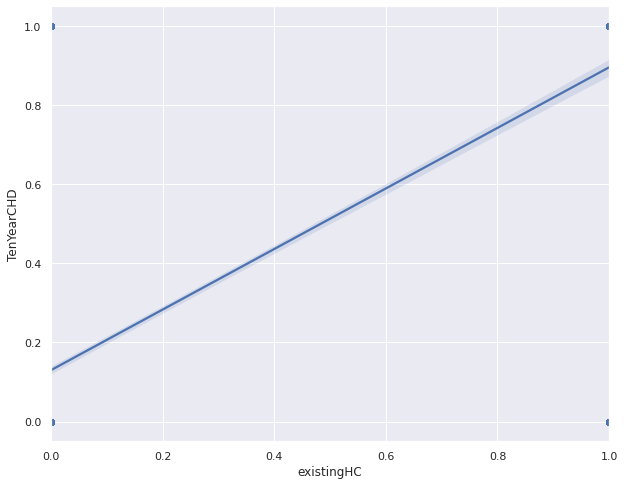

In [100]:
sns.regplot(x='existingHC',y='TenYearCHD',data=test)

This variable is certainly more strongly co-related than other variables which explains the boost in accuracy and sensitivity

**In conclusion, in order to improve the accuracy, we'll need to add new parameters such as existing heart condition. Other parameters that I can think of are their lifestyle (Eg: Active, sedentary), hereditary conditions. To be explored in future!**

#This was a fun exercise!